In [11]:
# 判断物质是金属还是岩石

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

filename = 'sonar.all-data.csv'

dataset = pd.read_csv(filename, header=None)
dataset.shape

(208, 61)

In [12]:
dataset.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [13]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.020,0.037,0.043,0.021,0.095,0.099,0.154,0.160,0.311,0.211,...,0.003,0.006,0.016,0.007,0.017,0.018,0.008,0.009,0.003,R
1,0.045,0.052,0.084,0.069,0.118,0.258,0.216,0.348,0.334,0.287,...,0.008,0.009,0.005,0.009,0.019,0.014,0.005,0.005,0.004,R
2,0.026,0.058,0.110,0.108,0.097,0.228,0.243,0.377,0.560,0.619,...,0.023,0.017,0.009,0.018,0.024,0.032,0.016,0.009,0.008,R
3,0.010,0.017,0.062,0.021,0.021,0.037,0.110,0.128,0.060,0.126,...,0.012,0.004,0.015,0.009,0.007,0.005,0.004,0.004,0.012,R
4,0.076,0.067,0.048,0.039,0.059,0.065,0.121,0.247,0.356,0.446,...,0.003,0.005,0.011,0.011,0.002,0.007,0.005,0.011,0.009,R
5,0.029,0.045,0.028,0.017,0.038,0.099,0.120,0.183,0.210,0.304,...,0.004,0.001,0.004,0.001,0.009,0.006,0.003,0.005,0.006,R
6,0.032,0.096,0.132,0.141,0.167,0.171,0.073,0.140,0.208,0.351,...,0.020,0.025,0.013,0.007,0.014,0.009,0.014,0.004,0.010,R
7,0.052,0.055,0.084,0.032,0.116,0.092,0.103,0.061,0.146,0.284,...,0.008,0.012,0.004,0.012,0.010,0.009,0.005,0.005,0.005,R
8,0.022,0.037,0.048,0.048,0.065,0.059,0.075,0.010,0.068,0.149,...,0.015,0.013,0.015,0.006,0.005,0.006,0.009,0.006,0.002,R
9,0.016,0.017,0.035,0.007,0.019,0.067,0.106,0.070,0.096,0.025,...,0.009,0.022,0.018,0.008,0.007,0.003,0.004,0.006,0.004,R


In [14]:
pd.set_option('precision', 3)
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


In [15]:
dataset.groupby(60).size()

60
M    111
R     97
dtype: int64

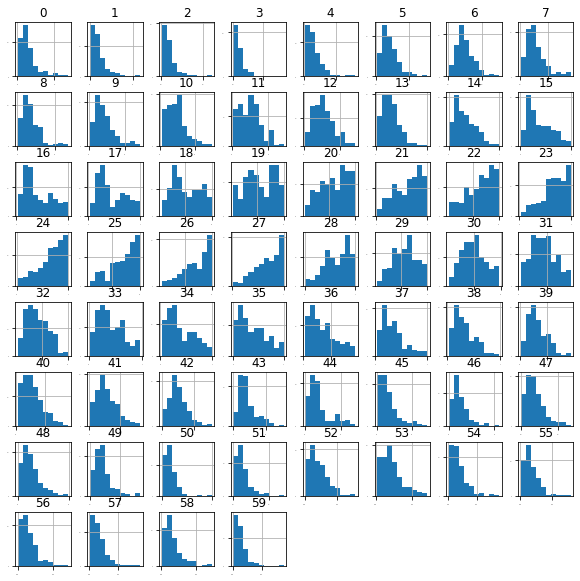

In [16]:
# 数据可视化

# 直方图
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(10,10))
plt.show()

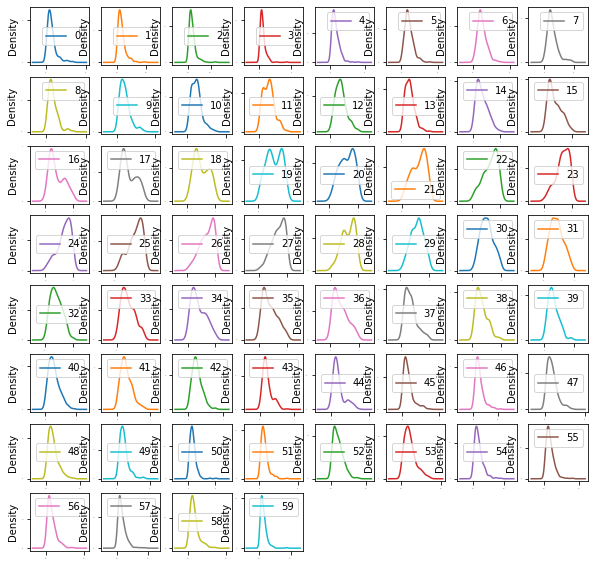

In [17]:
# 密度图
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, fontsize=1, figsize=(10,10))
plt.show()

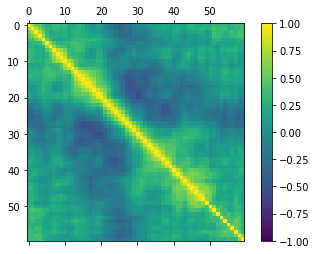

In [18]:
# 相关矩阵图
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

In [19]:
# 分离数据集
array = dataset.values
X = array[:, 0:60].astype(float)
Y = array[:, 60]
validatiomn_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validatiomn_size, random_state=seed)

In [21]:
# 评估算法 -- 评估标准
num_folds = 10
scoring = 'accuracy'

# 评估算法 -- 原始数据
models = {}
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()

# 评估算法
results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(models[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print("%s: %f (%f)" % (key, cv_result.mean(), cv_result.std()))

LR: 0.782721 (0.093796)
LDA: 0.746324 (0.117854)
KNN: 0.808088 (0.067507)
CART: 0.711029 (0.099363)
NB: 0.648897 (0.141868)
SVM: 0.608824 (0.118656)


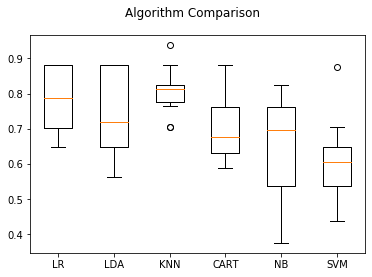

In [22]:
# 评估算法 -- 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [23]:
# 评估算法 -- 正态化数据
pipelines = {}
pipelines['ScalerLR'] = Pipeline([('Scaler', StandardScaler()), ('LR', LogisticRegression())])
pipelines['ScalerLDA'] = Pipeline([('Scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])
pipelines['ScalerKNN'] = Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])
pipelines['ScalerCART'] = Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])
pipelines['ScalerNB'] = Pipeline([('Scaler', StandardScaler()), ('NB', GaussianNB())])
pipelines['ScalerSVM'] = Pipeline([('Scaler', StandardScaler()), ('SVM', SVC())])

results = []
for key in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(pipelines[key], X_train, Y_train, cv=kfold,scoring=scoring)
    results.append(cv_result)
    print("%s: %f (%f)" % (key, cv_result.mean(), cv_result.std()))

ScalerLR: 0.734191 (0.095885)
ScalerLDA: 0.746324 (0.117854)
ScalerKNN: 0.825735 (0.054511)
ScalerCART: 0.723897 (0.102868)
ScalerNB: 0.648897 (0.141868)
ScalerSVM: 0.836397 (0.088697)


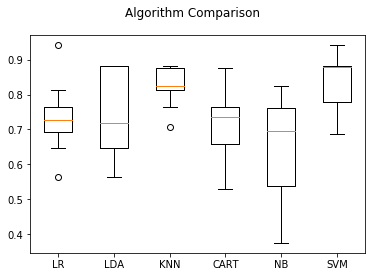

In [24]:
# 评估算法 -- 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [29]:
# 调参改善算法 -- KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优： %s 使用 %s '% (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'],
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print(' %f (%f) with %r' % (mean, std, param))

最优： 0.8493975903614458 使用 {'n_neighbors': 1} 
 0.849398 (0.059881) with {'n_neighbors': 1}
 0.837349 (0.066303) with {'n_neighbors': 3}
 0.837349 (0.037500) with {'n_neighbors': 5}
 0.765060 (0.089510) with {'n_neighbors': 7}
 0.753012 (0.086979) with {'n_neighbors': 9}
 0.734940 (0.104890) with {'n_neighbors': 11}
 0.734940 (0.105836) with {'n_neighbors': 13}
 0.728916 (0.075873) with {'n_neighbors': 15}
 0.710843 (0.078716) with {'n_neighbors': 17}
 0.722892 (0.084555) with {'n_neighbors': 19}
 0.710843 (0.108829) with {'n_neighbors': 21}


In [30]:
# 调参改善算法 -- SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train).astype(float)
param_grid = {}
param_grid['C'] = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
param_grid['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)

print('最优： %s 使用 %s '% (grid_result.best_score_, grid_result.best_params_))
cv_results = zip(grid_result.cv_results_['mean_test_score'], 
                 grid_result.cv_results_['std_test_score'],
                 grid_result.cv_results_['params'])
for mean, std, param in cv_results:
    print(' %f (%f) with %r' % (mean, std, param))

最优： 0.8674698795180723 使用 {'C': 1.5, 'kernel': 'rbf'} 
 0.759036 (0.098863) with {'C': 0.1, 'kernel': 'linear'}
 0.530120 (0.118780) with {'C': 0.1, 'kernel': 'poly'}
 0.572289 (0.130339) with {'C': 0.1, 'kernel': 'rbf'}
 0.704819 (0.066360) with {'C': 0.1, 'kernel': 'sigmoid'}
 0.746988 (0.108913) with {'C': 0.3, 'kernel': 'linear'}
 0.644578 (0.132290) with {'C': 0.3, 'kernel': 'poly'}
 0.765060 (0.092312) with {'C': 0.3, 'kernel': 'rbf'}
 0.734940 (0.054631) with {'C': 0.3, 'kernel': 'sigmoid'}
 0.740964 (0.083035) with {'C': 0.5, 'kernel': 'linear'}
 0.680723 (0.098638) with {'C': 0.5, 'kernel': 'poly'}
 0.789157 (0.064316) with {'C': 0.5, 'kernel': 'rbf'}
 0.746988 (0.059265) with {'C': 0.5, 'kernel': 'sigmoid'}
 0.746988 (0.084525) with {'C': 0.7, 'kernel': 'linear'}
 0.740964 (0.127960) with {'C': 0.7, 'kernel': 'poly'}
 0.813253 (0.084886) with {'C': 0.7, 'kernel': 'rbf'}
 0.753012 (0.058513) with {'C': 0.7, 'kernel': 'sigmoid'}
 0.759036 (0.096940) with {'C': 0.9, 'kernel': 'l

In [31]:
 # 集成算法
ensembles = {}
ensembles['ScaledAB'] = Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostClassifier())])
ensembles['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingClassifier())])
ensembles['ScaledRF'] = Pipeline([('Scaler', StandardScaler()), ('RFR', RandomForestClassifier())])
ensembles['ScaledET'] = Pipeline([('Scaler', StandardScaler()), ('ETR', ExtraTreesClassifier())])


results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_result = cross_val_score(ensembles[key], X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    print("%s: %f (%f)" % (key, cv_result.mean(), cv_result.std()))

ScaledAB: 0.813971 (0.066017)
ScaledGBM: 0.853676 (0.100318)
ScaledRF: 0.716544 (0.097193)
ScaledET: 0.764706 (0.050969)


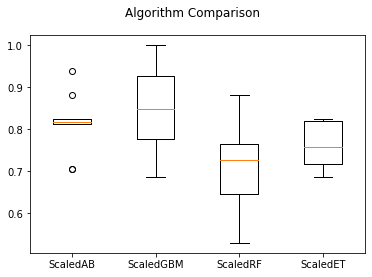

In [32]:
# 集成算法 -- 箱线图
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()

In [35]:
# 集成算法调参 

# 集成算法 GBM -- 调参
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = {'n_estimators':[10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900]}
model = GradientBoostingClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=rescaledX, y=Y_train)
print('最优： %s 使用 %s '% (grid_result.best_score_, grid_result.best_params_))


最优： 0.8614457831325302 使用 {'n_estimators': 400} 


In [38]:
# 模型最终话
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5, kernel='rbf')
model.fit(X=rescaledX, y=Y_train)

# 评估模型
rescaledX_validationX = scaler.transform(X_validation)
predictions = model.predict(rescaledX_validationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42

